In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

x:\Kuliah\Semester 8\Sandbox\myenv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../../Data preprocessing/Preprocessed data V2/arxiv_math_preprocessed.csv")
abstracts = df["summary"].to_list()
dates = df["date"].to_list()
ids = df["id"].to_list()

In [3]:
embedding_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = np.load("../../Topic extraction/abstract embeddings/all-mpnet-base-v2-embeddings V2/math_embeddingsV2.npy")
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1,2))
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [14]:
umap_model = UMAP(n_neighbors=30, 
                  n_components=30,
                  min_dist=0.1,
                  metric='cosine',
                  random_state=42)

In [15]:
hdbscan_model = HDBSCAN(min_cluster_size=50,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

In [16]:
topic_model = BERTopic(
    
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  ctfidf_model=ctfidf_model,

  n_gram_range=(1,2),
  top_n_words=10,
  nr_topics="auto"
)

# Train model
topics, probs = topic_model.fit_transform(abstracts, embeddings)

# Show topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,30663,-1_space_function_equation_problem,"[space, function, equation, problem, method, r...","[['study', 'family', 'stochastic', 'control', ..."
1,0,2485,0_category_algebra_code_control,"[category, algebra, code, control, process, co...","[['work', 'investigates', 'formal', 'policy', ..."
2,1,2160,1_graph_vertex_edge_number,"[graph, vertex, edge, number, coloring, connec...","[['finite', 'set', 'mathcalh', 'h1ldotshp', 'g..."
3,2,1414,2_manifold_curvature_metric_riemannian,"[manifold, curvature, metric, riemannian, ricc...","[['define', 'mathbbq', 'valued', 'deformation'..."
4,3,1411,3_solution_equation_boundary_omega,"[solution, equation, boundary, omega, existenc...","[['final', 'part', 'series', 'paper', 'study',..."
5,4,1390,4_channel_ri_communication_user,"[channel, ri, communication, user, antenna, mi...","[['reconfigurable', 'intelligent', 'surface', ..."
6,5,1110,5_estimator_sample_distribution_regression,"[estimator, sample, distribution, regression, ...","[['propose', 'set', 'goodness', 'fit', 'test',..."
7,6,1105,6_group_subgroup_finite group_finite,"[group, subgroup, finite group, finite, abelia...","[['let', 'g', 'group', 'n', 'normal', 'subgrou..."
8,7,961,7_optimization_algorithm_gradient_convergence,"[optimization, algorithm, gradient, convergenc...","[['paper', 'aim', 'develop', 'newton', 'type',..."
9,8,571,8_cohomology_sheaf_curve_variety,"[cohomology, sheaf, curve, variety, projective...","[['let', 'x', 'variety', 'stratification', 'ma..."


In [17]:
new_topics = topic_model.reduce_outliers(abstracts, topics, strategy="c-tf-idf")
topic_model.update_topics(abstracts, topics=new_topics)
topic_model.get_topic_info()

2024-10-15 19:27:23,843 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


,Topic,Count,Name,Representation,Representative_Docs
0,0,3906,0_algebra_category_system_process,"[algebra, category, system, process, code, tim...","[['work', 'investigates', 'formal', 'policy', ..."
1,1,3264,1_graph_vertex_edge_number,"[graph, vertex, edge, number, set, tree, every...","[['finite', 'set', 'mathcalh', 'h1ldotshp', 'g..."
2,2,3988,2_manifold_space_metric_curvature,"[manifold, space, metric, curvature, surface, ...","[['define', 'mathbbq', 'valued', 'deformation'..."
3,3,5572,3_equation_solution_problem_operator,"[equation, solution, problem, operator, space,...","[['final', 'part', 'series', 'paper', 'study',..."
4,4,1919,4_channel_communication_user_ri,"[channel, communication, user, ri, performance...","[['reconfigurable', 'intelligent', 'surface', ..."
5,5,2771,5_distribution_estimator_model_data,"[distribution, estimator, model, data, sample,...","[['propose', 'set', 'goodness', 'fit', 'test',..."
6,6,2962,6_group_subgroup_finite_algebra,"[group, subgroup, finite, algebra, representat...","[['let', 'g', 'group', 'n', 'normal', 'subgrou..."
7,7,3386,7_algorithm_problem_method_optimization,"[algorithm, problem, method, optimization, con...","[['paper', 'aim', 'develop', 'newton', 'type',..."
8,8,2827,8_variety_curve_cohomology_space,"[variety, curve, cohomology, space, projective...","[['let', 'x', 'variety', 'stratification', 'ma..."
9,9,1952,9_theory_field_symmetry_quantum,"[theory, field, symmetry, quantum, model, equa...","[['paper', 'begin', 'summary', 'powerful', 'fo..."


In [8]:
def calculate_coherence_score(model, abstracts, topics):
    documents = pd.DataFrame({"Abstracts": abstracts, "ID": range(len(abstracts)), "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Abstracts': ' '.join})

    analyzer = model.vectorizer_model.build_analyzer()
    tokens = [analyzer(doc) for doc in documents_per_topic.Abstracts]

    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]

    topic_words = [[word for word, _ in model.get_topic(topic)] for topic in range(len(set(topics))-1)]

    coherence_model = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    
    return coherence

In [18]:
coherence = calculate_coherence_score(topic_model, abstracts, new_topics)
print(coherence)

0.7737648979914973


In [ ]:
with open('math_topics_over_time.pkl', 'rb') as f:
    topics_over_time = pickle.load(f)

topics_over_time_df = pd.DataFrame(topics_over_time, columns=["Topic", "Timestamp", "Frequency"])

# Convert the 'Timestamp' column to a datetime object for easier grouping
topics_over_time_df['Timestamp'] = pd.to_datetime(topics_over_time_df['Timestamp'])

# Group by month and topic, summing only the 'Frequency' column
monthly_data = topics_over_time_df.groupby([topics_over_time_df['Timestamp'].dt.to_period('M'), 'Topic'])['Frequency'].sum().reset_index()

x:\Kuliah\Semester 8\Sandbox\myenv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
topic_model.visualize_topics()

In [2]:
topic_labels = {
    0:'Algebraic and categorical structures in mathematical systems',
    1:'Graph theory',
    2:'Differential geometry',
    3:'Partial Differential Equations (PDE)',
    4:'Wireless communication systems',
    5:'Statistical estimation and modeling',

    6:'Group theory and algebraic structures',
    7:'Gradient based optimization',
    8:'Algebraic geometry',
    9:'Mathematical model in quantum field theory',
    10:'Neural networks and deep learning',
    11:'Mathematical modelling in fluid dynamics',

    12:'Mathematical modeling in energy systems',
    13:'Number theory',
    14:'Ring theory and commutative algebra',
    15:'Quantum information and quantum computing',
    16:'Logic and set theory',
    17:'Special and zeta functions',

    18:'Mathematical proofs and conjectures',
    19:'Game theory and nash equilibrium',
    20:'Linear algebra and matrices',
    21:'Knot theory',
    22:'Epidemic modeling and disease spread',
    23:'Financial mathematics and stochastic processes',

    24:'Channel coding and information theory',
    25:'Polytope theory and convex geometry',
    26:'Cancer and tumor growth modeling',
    27:'Robotics and control systems',
    28:'Unmanned Aerial Vehicles (UAVs)'
}

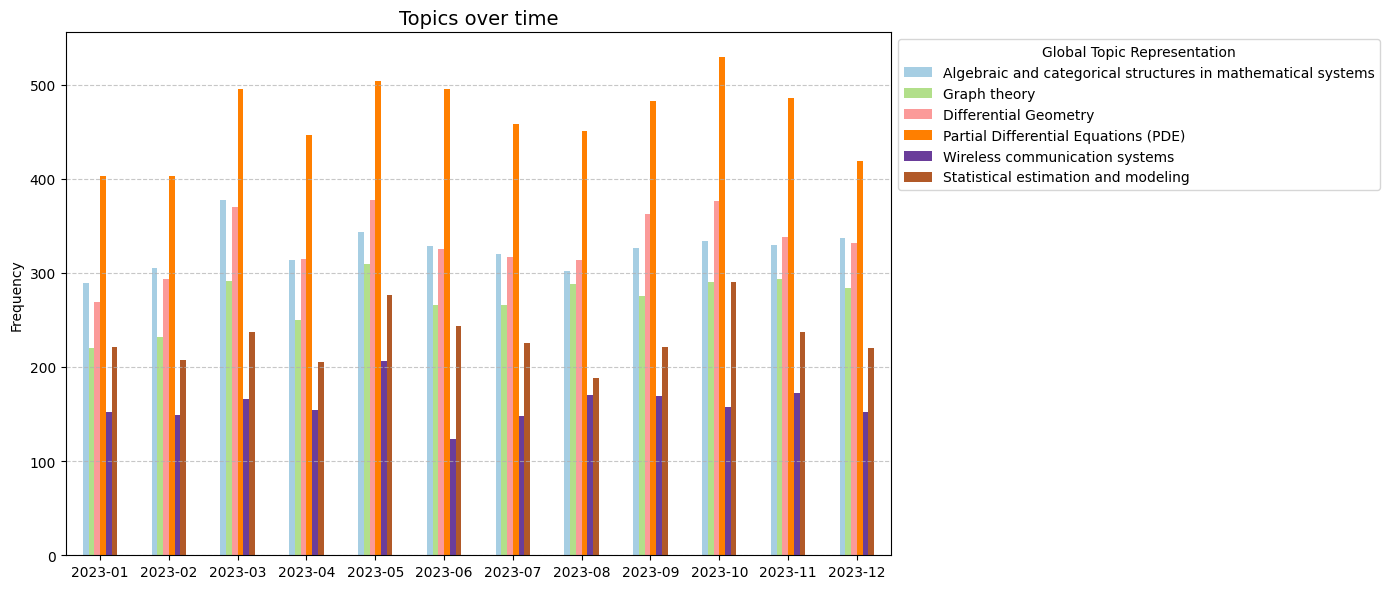

In [4]:
specific_topics = [0,1,2,3,4,5]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

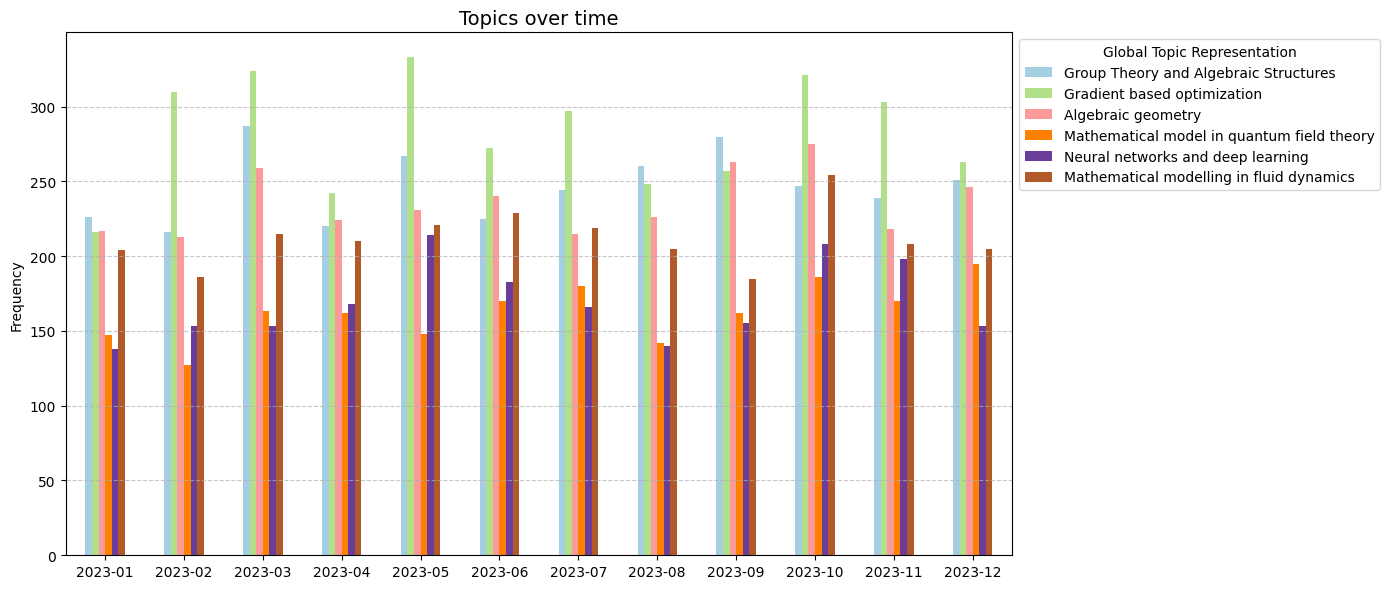

In [5]:
specific_topics = [6,7,8,9,10,11]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

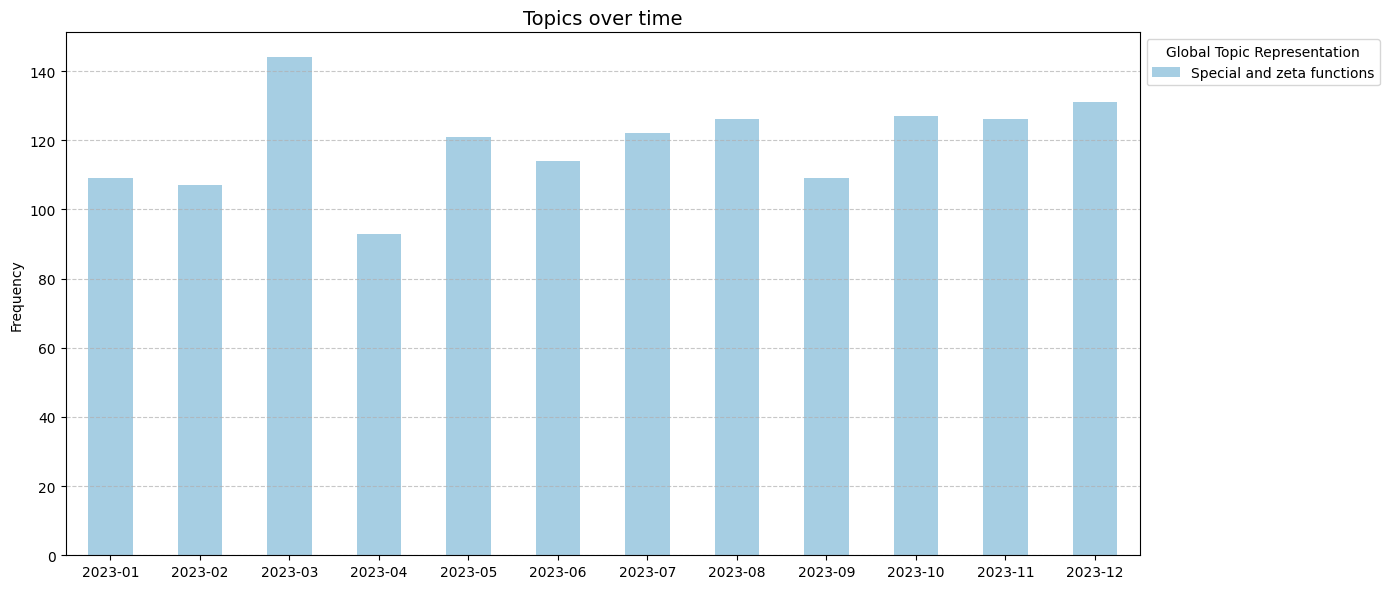

In [4]:
specific_topics = [17]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

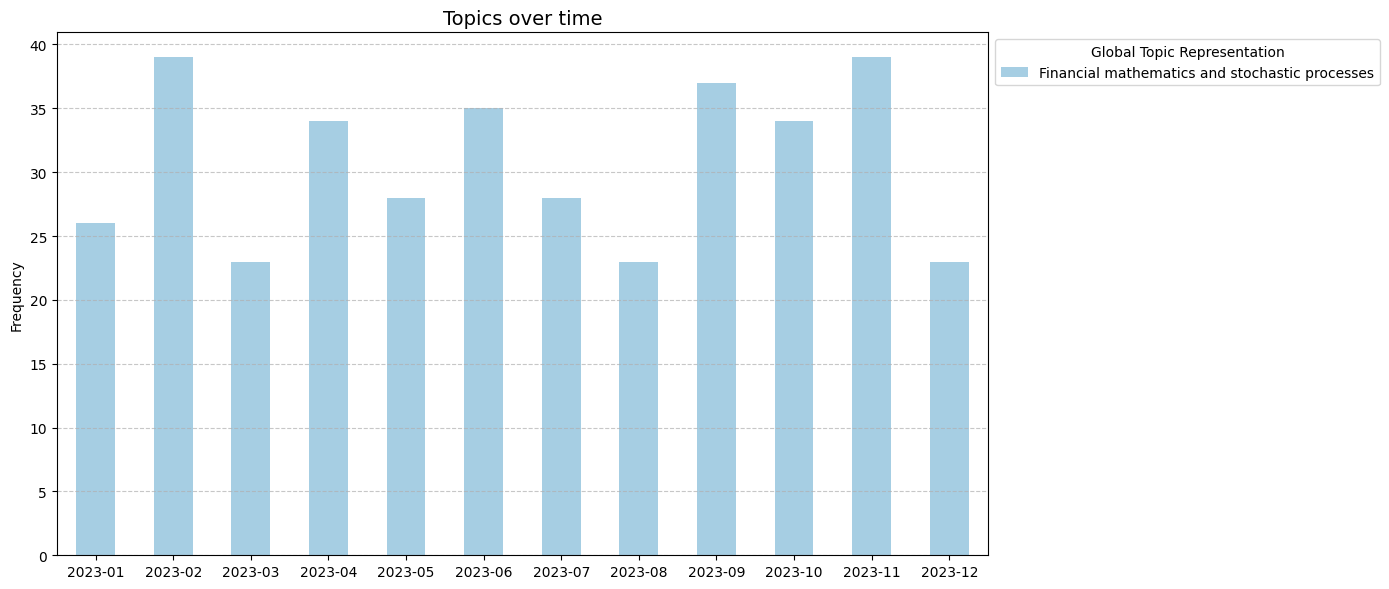

In [3]:
specific_topics = [23]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()

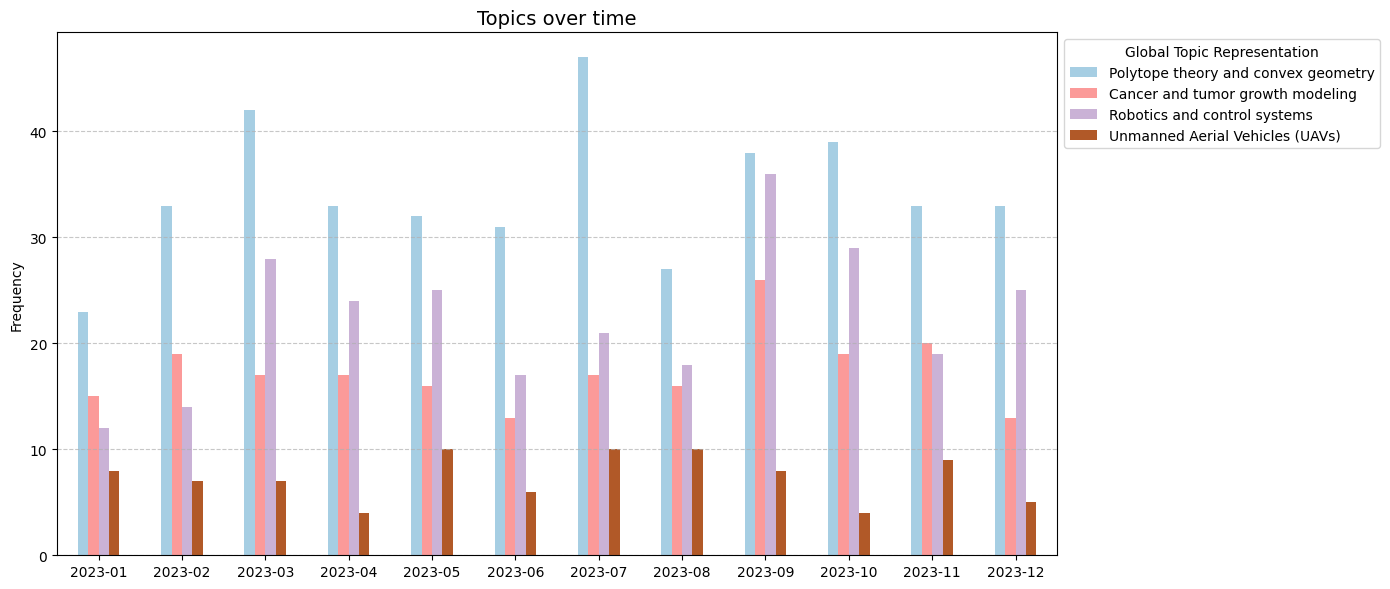

In [6]:
specific_topics = [25,26,27,28]

# Filter monthly_data to include only these specific topics
filtered_monthly_data = monthly_data[monthly_data['Topic'].isin(specific_topics)]

# Pivot the table to make it suitable for bar plotting (topics as columns)
pivoted_data = filtered_monthly_data.pivot(index='Timestamp', columns='Topic', values='Frequency')

# Plot as stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='Paired')

# Add legend outside the plot
ax.legend(title='Global Topic Representation', labels=[topic_labels.get(topic, topic) for topic in pivoted_data.columns],  bbox_to_anchor=(1, 1), loc='upper left')

# Customize the plot (similar to your image)
ax.set_title('Topics over time', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Frequency')

# Rotate x-axis labels for better readability
ax.set_xticklabels(pivoted_data.index.astype(str), rotation=0)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()